In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Applications/Training'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Applications/Testing'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+'/'+label):
        train_paths.append(train_dir + label +'/'+ image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

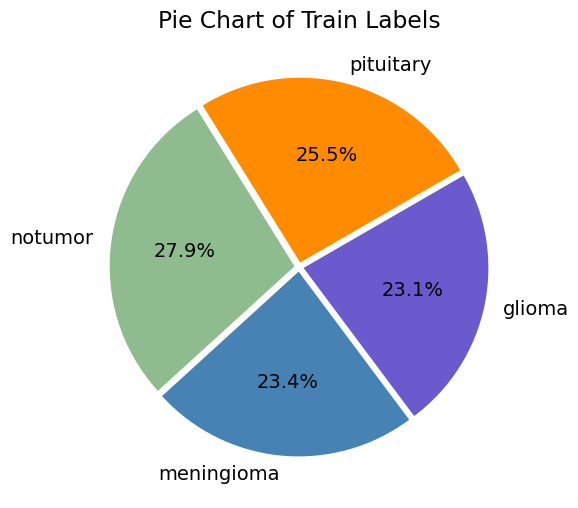

In [4]:
class PieChart:
    def __init__(self, data, labels, colors, explode, startangle, title):
        self.data = data
        self.labels = labels
        self.colors = colors
        self.explode = explode
        self.startangle = startangle
        self.title = title

    def create_pie_chart(self):
        fig, ax = plt.subplots(figsize=(14,6))
        plt.rcParams.update({'font.size': 14})
        ax.pie(self.data, labels=self.labels, colors=self.colors, autopct='%.1f%%',
               explode=self.explode, startangle=self.startangle)
        ax.set_title(self.title)
        return ax

pie_chart = PieChart(data=[len([x for x in train_labels if x=='pituitary']),
                           len([x for x in train_labels if x=='notumor']),
                           len([x for x in train_labels if x=='meningioma']),
                           len([x for x in train_labels if x=='glioma'])],
                     labels=['pituitary','notumor', 'meningioma', 'glioma'],
                     colors=['darkorange', 'darkseagreen', 'steelblue', 'slateblue'],
                     explode=(0.025,0.025,0.025,0.025),
                     startangle=30,
                     title='Pie Chart of Train Labels')

ax = pie_chart.create_pie_chart()
plt.show()

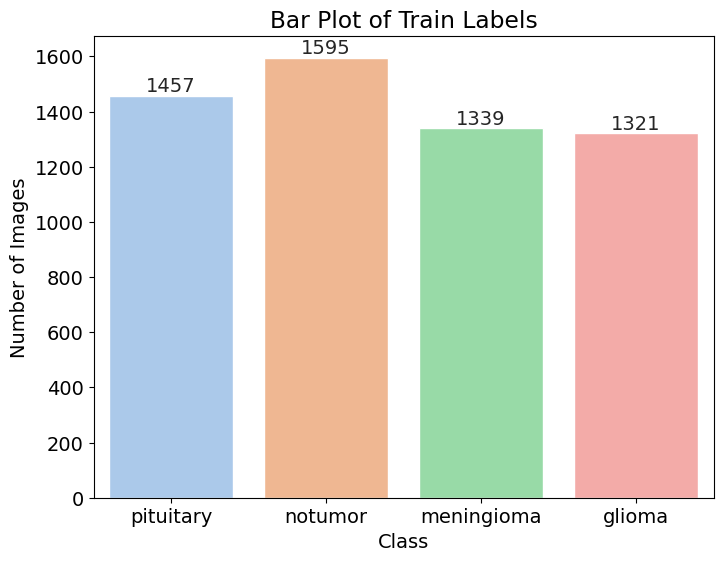

In [5]:
class BarPlot:
    def __init__(self, data, labels, title):
        self.data = data
        self.labels = labels
        self.title = title

    def create_bar_plot(self):
        fig, ax = plt.subplots(figsize=(8,6))
        sns.set_style("whitegrid")
        sns.barplot(x=self.labels, y=self.data, palette='pastel')
        ax.set_title(self.title)
        ax.set_xlabel('Class')
        ax.set_ylabel('Number of Images')
        return ax

# Create a bar plot of train labels
bar_plot = BarPlot(data=[len([x for x in train_labels if x=='pituitary']),
                         len([x for x in train_labels if x=='notumor']),
                         len([x for x in train_labels if x=='meningioma']),
                         len([x for x in train_labels if x=='glioma'])],
                   labels=['pituitary','notumor', 'meningioma', 'glioma'],
                   title='Bar Plot of Train Labels')

# annotate
ax2 = bar_plot.create_bar_plot()
ax2.bar_label(ax2.containers[0], label_type='edge')

plt.show()

In [7]:
class DataPaths:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.paths = []
        self.labels = []

    def read_data(self):
        for label in os.listdir(self.data_dir):
            for image in os.listdir(self.data_dir+'/'+label):
                self.paths.append(self.data_dir + label +'/'+ image)
                self.labels.append(label)

        self.paths, self.labels = shuffle(self.paths, self.labels)

train_data = DataPaths(train_dir)
train_data.read_data()
train_paths, train_labels = train_data.paths, train_data.labels

test_data = DataPaths(test_dir)
test_data.read_data()
test_paths, test_labels = test_data.paths, test_data.labels

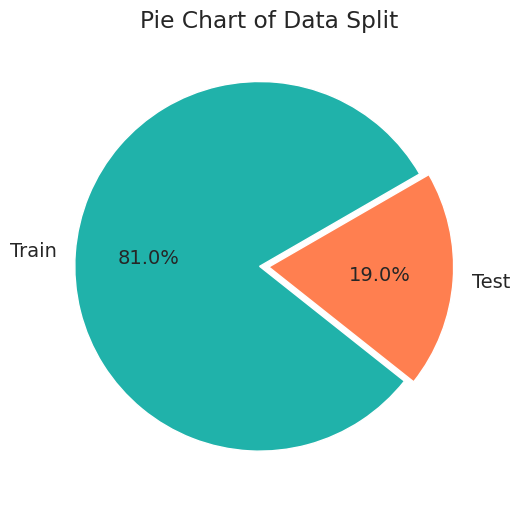

In [8]:
class PieChart:
    def __init__(self, data, labels, colors, explode, startangle, title):
        self.data = data
        self.labels = labels
        self.colors = colors
        self.explode = explode
        self.startangle = startangle
        self.title = title

    def create_pie_chart(self):
        fig, ax = plt.subplots(figsize=(14,6))
        sns.set_style("whitegrid")
        plt.rcParams.update({'font.size': 14})
        ax.pie(self.data, labels=self.labels, colors=self.colors, autopct='%.1f%%',
               explode=self.explode, startangle=self.startangle)
        ax.set_title(self.title)
        return ax


train_percent = round(len(train_labels)/(len(train_labels)+len(test_labels)),2)*100
test_percent = 100 - train_percent

pie_chart = PieChart(data=[train_percent, test_percent],
                     labels=['Train','Test'],
                     colors=['lightseagreen', 'coral'],
                     explode=(0.05,0),
                     startangle=30,
                     title='Pie Chart of Data Split')

ax = pie_chart.create_pie_chart()
plt.show()


In [ ]:
# Import ImageIO
import imageio.v2 as imageio

im = imageio.imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning Applications/Training/meningioma/Tr-me_0031.jpg')
print(im.meta.keys())
# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

odict_keys(['jfif', 'jfif_version', 'jfif_unit', 'jfif_density'])
Image type: <class 'imageio.core.util.Array'>
Shape of image array: (224, 224, 3)


In [ ]:
print('Data type of image:', im.dtype)


Data type of image: uint8


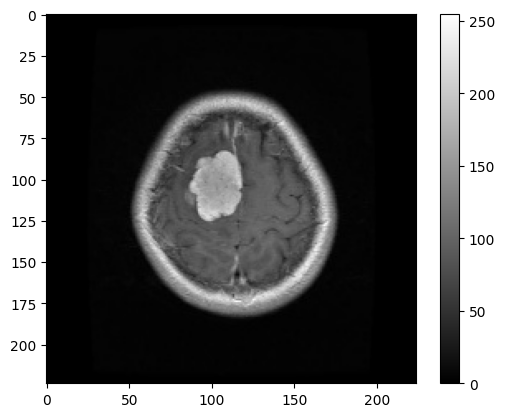

In [ ]:
import matplotlib.pyplot as plt

# Plot the grayscale image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

In [ ]:
def format_and_render_plot():
    fig = plt.gcf()
    for ax in fig.axes:
        ax.legend(loc='center right')   
    plt.tight_layout()
    plt.show()

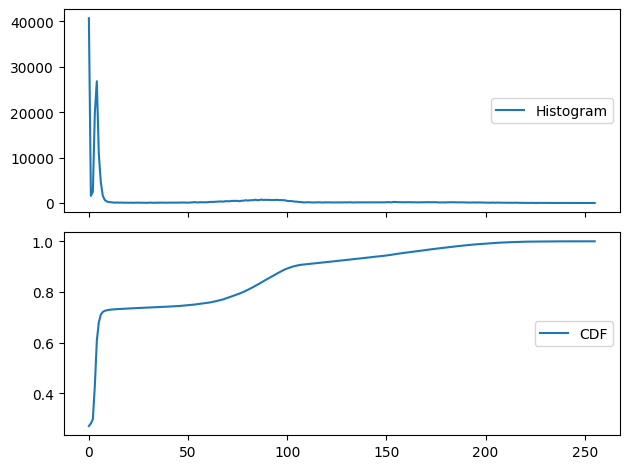

In [ ]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
format_and_render_plot()

In [ ]:
def fnr_plot():
    fig = plt.gcf()
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

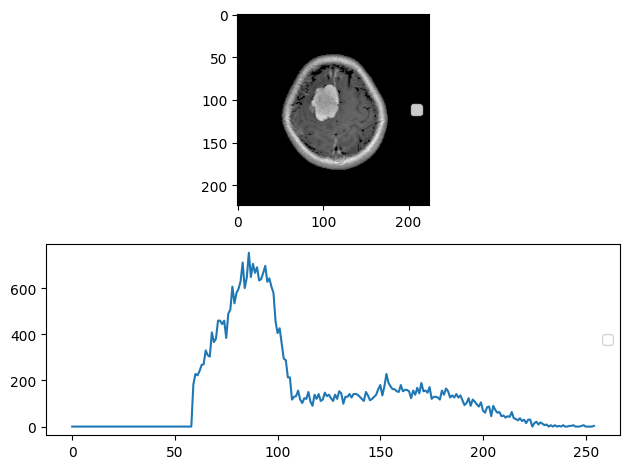

In [ ]:
import numpy as np

# create a mask
mask = im >= 60
im_mask = np.where(mask, im, 0)

# Get the histogram of brain MRI intensity
hist = ndi.histogram(im_mask, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_mask, cmap='gray')
axes[1].plot(hist)
format_and_render_plot()

In [ ]:
# Smooth intensity values
im_filt = ndi.median_filter(im, size=3)
im_filt.shape

(224, 224, 3)

In [ ]:
# Select high-intensity pixels
mask_start = np.where(im_filt>120, 1, 0)
mask = ndi.binary_closing(mask_start)

In [ ]:
# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:',nlabels)

Num. Labels: 7


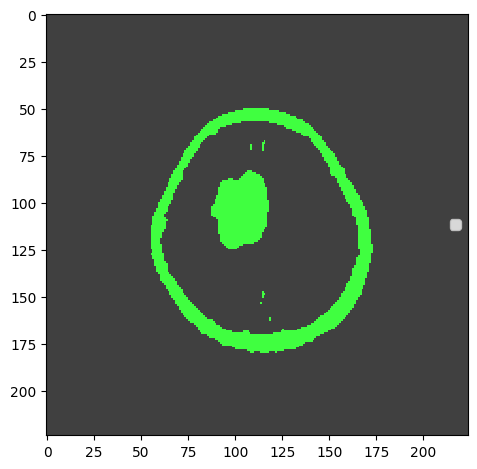

In [ ]:
# Create a `labels` overlay
overlay = np.where(labels>0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow', alpha=0.75)
format_and_render_plot()

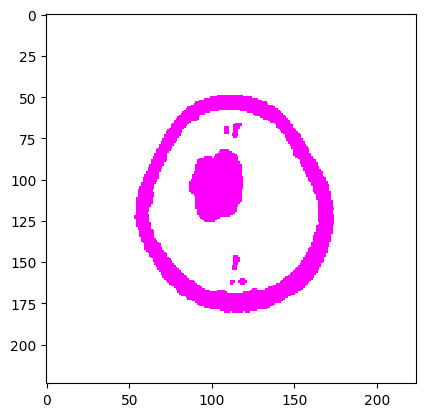

In [ ]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select specific pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()